# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [106]:
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\pkuzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [107]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep = '\t')

### Step 4. See the first 10 entries

In [108]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

<Axes: xlabel='item_name'>

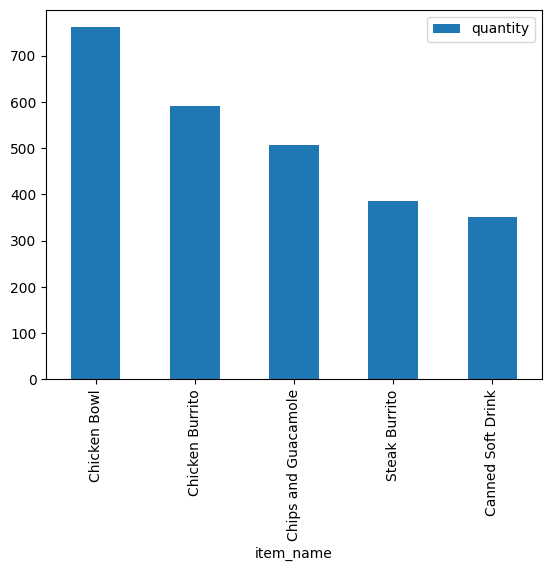

In [109]:
chipo_hist=chipo[['item_name','quantity']].groupby('item_name').sum().sort_values('quantity',ascending=False)
chipo_hist=chipo_hist.head(5)
chipo_hist.plot(kind='bar')


### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

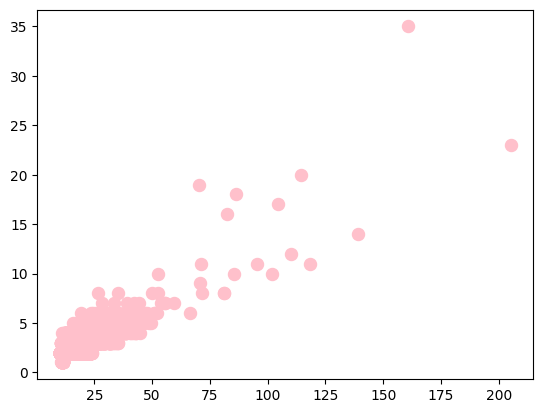

In [110]:
def change_item(a):    
    return float((lambda a : a[1:-1])(a))
    
chipo['item_price']=chipo['item_price'].apply(change_item)
orders = chipo.groupby('order_id').sum()

plt.scatter(x = orders['item_price'], y = orders['quantity'], s=75, c='pink', alpha=1)

### Step 7. BONUS: Create a question and a graph to answer your own question.

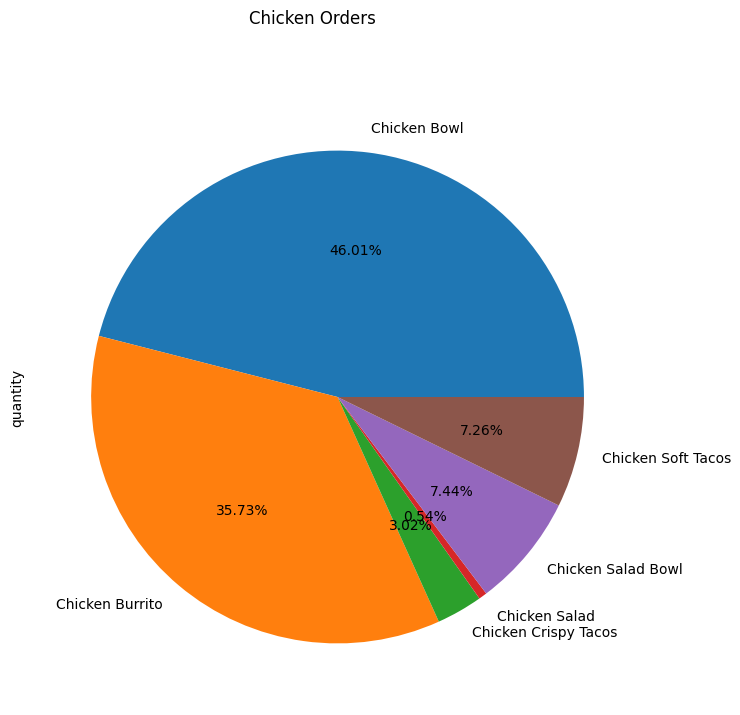

In [166]:
#Create pie chart containing only chicken orders -> Amount of orders


chipo_chicken = chipo[chipo.item_name.str.startswith('Chicken')]
chipo_chicken = chipo_chicken[['item_name','quantity']].groupby('item_name').sum()
chipo_chicken

plot = chipo_chicken.plot.pie(subplots=True, figsize=(20,8), legend = False, title = 'Chicken Orders',autopct='%.2f%%')
#https://stackoverflow.com/questions/72338356/how-to-show-values-in-pandas-pie-chart
#https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct